In [1]:
# dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
filepathp = os.path.join('output','team_points.csv')
filepathw = os.path.join('output','team_wins.csv')
teamPoints = pd.read_csv(filepathp)
teamWins = pd.read_csv(filepathw)

In [3]:
merged_df = pd.merge(teamPoints,teamWins, on=['Team','Year'],how='outer')
merged_df

,Team,Year,WINorLOSS,TeamPoints,Assists,FieldGoals,TotalRebounds,TeamName,League,Season,Division,Franchise,W,L,%
0,ATL,2014,W,2360,590,859,962,Atlanta Hawks,NaN,(2014-15),Southeast Division,Atlanta Hawks,60,22,73.20%
1,ATL,2015,W,6185,1566,2301,2392,Atlanta Hawks,NaN,(2015-16),Southeast Division,Atlanta Hawks,48,34,58.50%
2,ATL,2016,W,4763,1200,1795,1977,Atlanta Hawks,NaN,(2016-17),Southeast Division,Atlanta Hawks,43,39,52.40%
3,ATL,2017,W,4024,947,1498,1670,Atlanta Hawks,NaN,(2017-18),Southeast Division,Atlanta Hawks,24,58,29.30%
4,ATL,2018,W,1468,357,552,629,Atlanta Hawks,NaN,(2018-19),Southeast Division,Atlanta Hawks,29,53,35.40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,WAS,2014,W,2273,583,897,959,Washington Wizards,NaN,(2014-15),Southeast Division,Washington Wizards,46,36,56.10%
146,WAS,2015,W,3973,969,1528,1702,Washington Wizards,NaN,(2015-16),Southeast Division,Washington Wizards,41,41,50.00%
147,WAS,2016,W,4708,1123,1807,1872,Washington Wizards,NaN,(2016-17),Southeast Division,Washington Wizards,49,33,59.80%
148,WAS,2017,W,6070,1344,2294,2416,Washington Wizards,NaN,(2017-18),Southeast Division,Washington Wizards,43,39,52.40%


In [4]:
#merged_df.to_csv("output/merged_df.csv", encoding="utf-8", index=False, header=True)

In [27]:
merged_sort = merged_df.loc[:,['Year','Team','W','TeamPoints','Assists','FieldGoals','TotalRebounds']]
merged_sort

,Year,Team,W,TeamPoints,Assists,FieldGoals,TotalRebounds
0,2014,ATL,60,2360,590,859,962
1,2015,ATL,48,6185,1566,2301,2392
2,2016,ATL,43,4763,1200,1795,1977
3,2017,ATL,24,4024,947,1498,1670
4,2018,ATL,29,1468,357,552,629
...,...,...,...,...,...,...,...
145,2014,WAS,46,2273,583,897,959
146,2015,WAS,41,3973,969,1528,1702
147,2016,WAS,49,4708,1123,1807,1872
148,2017,WAS,43,6070,1344,2294,2416


In [28]:
merged_clean = merged_sort.rename(columns={'Year': 'Year', 
                                         'Team': 'Teams', 
                                         'TeamPoints':'Points', 
                                         'Assists': 'Assists', 
                                         'FieldGoals': 'Field Goals', 
                                         'TotalRebounds':'Rebounds', 
                                         'W': 'Wins'}).reset_index(drop=True)
merged_clean

,Year,Teams,Wins,Points,Assists,Field Goals,Rebounds
0,2014,ATL,60,2360,590,859,962
1,2015,ATL,48,6185,1566,2301,2392
2,2016,ATL,43,4763,1200,1795,1977
3,2017,ATL,24,4024,947,1498,1670
4,2018,ATL,29,1468,357,552,629
...,...,...,...,...,...,...,...
145,2014,WAS,46,2273,583,897,959
146,2015,WAS,41,3973,969,1528,1702
147,2016,WAS,49,4708,1123,1807,1872
148,2017,WAS,43,6070,1344,2294,2416


In [31]:
yr2014_df = merged_clean.loc[merged_df['Year'] == 2014,:]
yr2014_df

,Year,Teams,Wins,Points,Assists,Field Goals,Rebounds
0,2014,ATL,60,2360,590,859,962
5,2014,BOS,40,1186,300,464,500
10,2014,BRK,38,1544,332,580,653
15,2014,CHI,50,2297,471,808,1011
20,2014,CHO,33,1059,229,404,462
25,2014,CLE,53,1960,451,720,748
30,2014,DAL,50,2616,586,981,950
35,2014,DEN,30,1360,279,501,619
40,2014,DET,32,823,160,310,383
45,2014,GSW,67,2758,682,1041,1146


The correlation coefficient for team wins to team points is: 0.8973

the regression equation is: y = 46.66x + -216.1

the r value is: 0.8973292305364438



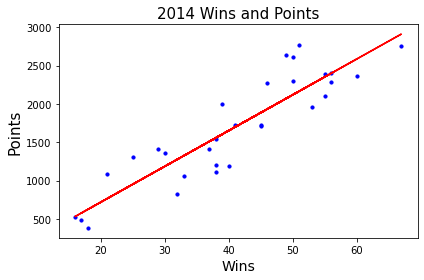

In [32]:
# Calculate the correlation coefficient and linear regression model 
correlation_coefficient = round(sts.pearsonr(yr2014_df['Wins'], yr2014_df['Points'])[0],4)

print(f'The correlation coefficient for team wins to team points is: {correlation_coefficient}\n')

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(yr2014_df['Wins'], yr2014_df['Points'])
regress_values = slope * yr2014_df['Wins'] + intercept
#print(regress_values)

equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
print(f'the regression equation is: {equation}\n')
print(f'the r value is: {rvalue}\n')
#plt.figure(figsize=(15,8))
plt.scatter(yr2014_df['Wins'], yr2014_df['Points'], s=10, c='b')
plt.plot(yr2014_df['Wins'], regress_values, color='red')
plt.title('2014 Wins and Points',fontsize =15)
plt.xlabel('Wins',fontsize =14)
plt.ylabel('Points',fontsize =15)
plt.annotate(equation, xy=(10, 10), fontsize=20, color='red')
plt.tight_layout()
plt.show()